In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing


In [56]:
df_de =pd.read_excel('data.xlsx',sheet_name='sheet1',index_col=0, engine='openpyxl')
df_de.drop(['FRS_Id'], axis=1, inplace=True)
df_de = df_de.reset_index()

In [3]:
df_de.head()

,Facility Id,Facility_Name,City,State,Zip Code,Address,County,Latitude,Longitude,Primary_NAICS_Code,...,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,1004377,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.298570,-96.535860,562212,...,504064.000,518680.250,653854.000000,250497.500000,221014.750000,199011.750000,241883.500000,289953.250000,204000.000000,194000.000000
1,1000112,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.663000,-74.000000,221112,...,60819.700,44658.384,70705.288000,52698.656000,66797.352000,67399.252000,40722.200000,102599.220000,68984.744000,100591.828000
2,1013621,3Bear Libby Gas Plant,Hobbs,NM,88240,674 Marathon Rd,LEA COUNTY,32.540693,-103.522351,211130,...,40521.812,38691.478,435280.099943,431488.809907,447423.757318,467277.995747,491686.293592,500278.254166,507639.706331,534026.861412
3,1003742,31st Street Landfill,WESTCHESTER,IL,60154,11700 W 31ST ST,COOK COUNTY,41.835129,-87.915924,562212,...,100500.948,18925.400,31220.150000,29026.800000,120657.600000,92696.600000,120707.350000,97467.500000,87357.750000,95113.250000
4,1003188,3M BROWNWOOD,BROWNWOOD,TX,76801,4501 HIGHWAY 377 SOUTH,BROWN COUNTY,31.671177,-98.996513,326113,...,29359.640,30571.636,34432.420000,36202.264000,31773.480000,36754.712000,36419.864000,34821.820000,33671.924000,37149.360000


# Using Multioutput regressor for predicting 3 years

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
X = df_de.drop(['2020','2019','2018','Facility Id','Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County','Primary_NAICS_Code', 'IT_subparts', 'IT_sectors','Primary_NAICS_Code'],axis = 1)
st_dummies=pd.get_dummies(df_de['State'])
X_st = X.join(st_dummies)
#X_st = sm.add_constant(X_st)
y_st=df_de[['2020','2019','2018']]
X_st_train, X_st_test, y_st_train, y_st_test=train_test_split(X_st, y_st, test_size = 0.25, random_state = 246)
X_st_train.columns

Index(['Latitude', 'Longitude', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

In [6]:
max_depth = 30
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
)
regr_multirf.fit(X_st_train, y_st_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=0))

In [7]:
regr_multirf.score(X_st_train, y_st_train)

0.990539508766097

In [14]:
y_multirf = regr_multirf.predict(X_st_test)


In [10]:
y_st_test.iloc[:,0]

4144     193378.584
958      196779.850
3697       4757.974
2616      52955.286
5793      26758.598
           ...     
1451    5666069.672
2331     603359.194
2518      96490.800
5587      15247.804
2044      18881.164
Name: 2020, Length: 1629, dtype: float64

In [11]:
y_multirf

array([[164988.90625735, 155196.51828   , 144583.56870255],
       [133085.64615734, 145570.11095266, 122416.25557   ],
       [ 13152.09328786,  17525.84714318,  19376.7491626 ],
       ...,
       [ 86829.36659199,  90341.62964072,  96632.76493112],
       [ 49959.50129521,  49955.99747219,  51028.95623277],
       [ 44290.15364   ,  50113.14082   ,  55984.41408   ]])

In [17]:
import math

print('Mean squared error', mean_squared_error(y_st_test, y_multirf))
print('SQRT of R-squared', math.sqrt(mean_squared_error(y_st_test, y_multirf)))
print('Mean absolute error', mean_absolute_error(y_st_test, y_multirf))
#print('R-sqruared',regr_multirf.rsquared)

Mean squared error 127081227585.64314
SQRT of R-squared 356484.5404581286
Mean absolute error 108564.65879696335


### algorithm for the future 10 yrs prediction

for future in futures(1 to 10 years): X = features[1:10] y= target[11] yfuture=model.predict(y) X.drop(features[1]) shift columns from 2 to 10, to 1 to 9 X[10] = yfuture

fit the model for 7 years and predict 3 years

other metrics to evaluate..

### Building a Linear regression model to predict one year

In [78]:
X = df_de.drop(['Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County','Primary_NAICS_Code', 'IT_subparts', 'IT_sectors','Primary_NAICS_Code'],axis = 1)
st_dummies=pd.get_dummies(df_de['State'])
X= X.join(st_dummies)
X.shape


(6515, 67)

In [61]:
X =X.drop(['2020'], axis=1)
y=df_de[['2020']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 246)
rModel = sm.OLS(y_train, X_train)
rModel_results = rModel.fit()
rModel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2020   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1619.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:30:02   Log-Likelihood:                -67023.
No. Observations:                4886   AIC:                         1.342e+05
Df Residuals:                    4820   BIC:                         1.346e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Facility Id    -0.0671      0.875     -0.077      0.939      -1.782       1.648
Latitude     2067.6050   2373.332      0.871      0.384   -2585.208    6720.418
Longitude    5171.4692   1718.846      3.009      0.003    1801.746    8541.192
2019            0.8054      0.015     54.238      0.000       0.776       0.835
2018            0.1487      0.019      7.649      0.000       0.111       0.187
2017           -0.0096      0.020     -0.486      0.627      -0.048       0.029
2016            0.0567      0.020      2.864      0.004       0.018       0.095
2015            0.0769      0.019      4.032      0.000       0.040       0.114
2014           -0.2485      0.019    -13.228      0.000      -0.285      -0.212
2013            0.0545      0.018      2.999      0.003       0.019       0.090
2012            0.0169      0.016      1.043      0.297      -0.015       0.049
2011            0.0025      0.012      0.208      0.835      -0.021       0.026
AK            7.27e+05   9.15e+05      0.795      0.427   -1.07e+06    2.52e+06
AL            4.56e+05   8.89e+05      0.513      0.608   -1.29e+06     2.2e+06
AR           4.223e+05   8.91e+05      0.474      0.636   -1.32e+06    2.17e+06
AZ           6.518e+05   8.94e+05      0.729      0.466    -1.1e+06     2.4e+06
CA            6.28e+05   8.97e+05      0.700      0.484   -1.13e+06    2.39e+06
CO           5.474e+05   8.94e+05      0.612      0.540   -1.21e+06     2.3e+06
CT           4.133e+05   8.89e+05      0.465      0.642   -1.33e+06    2.16e+06
DC           3.902e+05   8.96e+05      0.436      0.663   -1.37e+06    2.15e+06
DE           3.828e+05   8.91e+05      0.430      0.667   -1.36e+06    2.13e+06
FL           5.039e+05   8.87e+05      0.568      0.570   -1.24e+06    2.24e+06
GA           4.154e+05   8.89e+05      0.467      0.640   -1.33e+06    2.16e+06
GU          -6.388e+05   9.44e+05     -0.677      0.499   -2.49e+06    1.21e+06
HI           8.334e+05   9.08e+05      0.917      0.359   -9.48e+05    2.61e+06
IA           4.604e+05   8.92e+05      0.516      0.606   -1.29e+06    2.21e+06
ID           5.825e+05   8.99e+05      0.648      0.517   -1.18e+06    2.34e+06
IL           4.542e+05    8.9e+05      0.510      0.610   -1.29e+06     2.2e+06
IN           4.029e+05    8.9e+05      0.453      0.651   -1.34e+06    2.15e+06
KS           5.092e+05   8.92e+05      0.571      0.568   -1.24e+06    2.26e+06
KY           4.248e+05    8.9e+05      0.477      0.633   -1.32e+06    2.17e+06
LA           4.784e+05    8.9e+05      0.537      0.591   -1.27e+06    2.22e+06
MA           3.522e+05   8.89e+05      0.396      0.692   -1.39e+06    2.09e+06
MD           3.717e+05   8.89e+05      0.418      0.676   -1.37e+06    2.12e+06
ME           3.322e+05   8.91e+05      0.373      0.709   -1.41e+06    2.08e+06
MI           3.846e+05   8.92e+05      0.43

1629

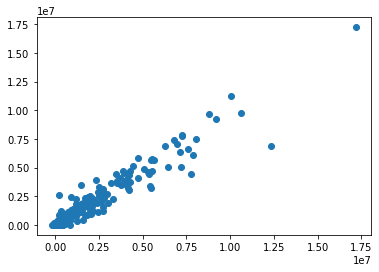

In [79]:
y_pred = rModel_results.predict(X_test)
plt.scatter(x=y_pred,y= y_test)
len(y_pred)

### Evaluation of the model

In [25]:
print('Mean squared error of OLS model, States one-hot encoded', mean_squared_error(y_test, y_pred))
print('SQRT of R-squared', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean absolute error of OLS model, States one-hot encoded', mean_absolute_error(y_test, y_pred))
print('R-sqruared', rModel_results.rsquared)

Mean squared error of OLS model, States one-hot encoded 76031124856.73987
SQRT of R-squared 275737.4201241824
Mean absolute error of OLS model, States one-hot encoded 93418.9572518159
R-sqruared 0.9562136723275587


### Trying to make a loop to forecast the future year after year.. not sure what should be assigned to 'y'.. first time, I predict for the year '2020' having X['2011': '2019'] as training data and Y is ['2020']... next, X['2012':'2020'] will be training data and what will be 'y'??

In [81]:
X = df_de.drop(['Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County','Primary_NAICS_Code', 'IT_subparts', 'IT_sectors','Primary_NAICS_Code'],axis = 1)
st_dummies=pd.get_dummies(df_de['State'])
X= X.join(st_dummies)
X_copy=X.copy()

years =  ['2020','2019', '2018', '2017', '2016','2015', '2014', '2013', '2012','2011']
years_future = ['2020','2021','2022','2023','2024','2025','2026','2027','2028','2029']
y_future = {}
i=9
yr=2020
X =X.drop(['2020'], axis=1)
y=df_de[['2020']]
for year in years_future:
    print(X.shape, y.shape)
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 246)
    rModel = sm.OLS(y_train, X_train)
    rModel_results = rModel.fit()
    y_pred = rModel_results.predict(X_test)

    #append the results to the dataframe
    
    y_future={year:y_pred}
    print(year,'\n',years_future,'\n',i)
   
    X=X.append(y_future, ignore_index=True)
    X = X.drop([years[-1]],axis = 1)
    years.pop(i)
    i=i-1
    print(y_future)
    
    


(6515, 66) (6515, 1)
2020 
 ['2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029'] 
 9
{'2020': 4144    1.881656e+05
958     1.709005e+05
3697    5.574663e+04
2616    6.142271e+04
5793    3.735785e+04
            ...     
1451    5.633751e+06
2331    5.467243e+05
2518    1.009024e+05
5587    6.906058e+04
2044   -4.142851e+03
Length: 1629, dtype: float64}
(6516, 66) (6515, 1)


ValueError: Found input variables with inconsistent numbers of samples: [6516, 6515]

In [50]:
df_de.columns

Index(['Facility Id', 'Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       'IT_sectors', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011'],
      dtype='object')

In [37]:
y_future[1]

4144    1.862809e+05
958     2.019301e+05
3697    2.424110e+04
2616    5.995418e+04
5793    1.104098e+04
            ...     
1451    5.282941e+06
2331    5.524665e+05
2518    1.034043e+05
5587    4.268079e+04
2044   -2.976768e+04
Length: 1629, dtype: float64

In [ ]:
df_de.join(y_future, columns)